In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import folium
from matplotlib import colors

import network_maps

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
plt.rcParams["figure.dpi"] = 200
fig_size = (8, 4)

In [2]:
# List of directories to iterate through
data_dirs = [
    'starlink-terminal-grpc-dump/2024-12-12-starlink/',
    'starlink-terminal-grpc-dump/2025-01-09-starlink/',
    'starlink-terminal-grpc-dump/2025-01-30-starlink/',
    'starlink-terminal-grpc-dump/2025-02-13-starlink/',
    'starlink-terminal-grpc-dump/2025-03-13-starlink/',
    'starlink-terminal-grpc-dump/2025-03-20-starlink/'
]

df_list = []

for data_dir in data_dirs:
    print(f"Processing directory: {data_dir}")
    list_of_files = os.listdir(data_dir)
    list_of_files.sort()
    num_files = len(list_of_files)
    print(f'Number of files in {data_dir}: {num_files}')

    for file in list_of_files:
        # Skipping files that do not end with ".gzip"
        if not file.endswith(".gzip"):
            continue
        temp_df = pd.read_parquet(os.path.join(data_dir, file)) 
        df_list.append(temp_df)

# Concatenate all DataFrames
#df = pd.concat(df_list, ignore_index=True)
df = pd.concat(df_list)

print("Final DataFrame shape:", df.shape)
df.info()
df.head()

Processing directory: starlink-terminal-grpc-dump/2024-12-12-starlink/
Number of files in starlink-terminal-grpc-dump/2024-12-12-starlink/: 14
Processing directory: starlink-terminal-grpc-dump/2025-01-09-starlink/
Number of files in starlink-terminal-grpc-dump/2025-01-09-starlink/: 8
Processing directory: starlink-terminal-grpc-dump/2025-01-30-starlink/
Number of files in starlink-terminal-grpc-dump/2025-01-30-starlink/: 12
Processing directory: starlink-terminal-grpc-dump/2025-02-13-starlink/
Number of files in starlink-terminal-grpc-dump/2025-02-13-starlink/: 6
Processing directory: starlink-terminal-grpc-dump/2025-03-13-starlink/
Number of files in starlink-terminal-grpc-dump/2025-03-13-starlink/: 11
Processing directory: starlink-terminal-grpc-dump/2025-03-20-starlink/
Number of files in starlink-terminal-grpc-dump/2025-03-20-starlink/: 10
Final DataFrame shape: (218979, 69)
<class 'pandas.core.frame.DataFrame'>
Index: 218979 entries, 0 to 2978
Data columns (total 69 columns):
 #  

/var/folders/ww/x6hrm19d671cgb5mxkbtxdr80000gn/T/ipykernel_81144/3997122913.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list)


,@timestamp,dish_status.hardware_version,dish_status.software_version,dish_status.state,dish_status.uptime,dish_status.snr,dish_status.seconds_to_first_nonempty_slot,dish_status.pop_ping_drop_rate,dish_status.downlink_throughput_bps,dish_status.uplink_throughput_bps,dish_status.pop_ping_latency_ms,dish_status.alerts,dish_status.fraction_obstructed,dish_status.currently_obstructed,dish_status.seconds_obstructed,dish_status.obstruction_duration,dish_status.obstruction_interval,dish_status.direction_azimuth,dish_status.direction_elevation,dish_status.is_snr_above_noise_floor,dish_status.wedges_fraction_obstructed,dish_status.raw_wedges_fraction_obstructed,dish_status.valid_s,dish_status.alert_motors_stuck,dish_status.alert_thermal_throttle,dish_status.alert_thermal_shutdown,dish_status.alert_mast_not_near_vertical,dish_status.alert_unexpected_location,dish_status.alert_slow_ethernet_speeds,dish_status.alert_slow_ethernet_speeds_100,dish_status.alert_roaming,dish_status.alert_install_pending,dish_status.alert_is_heating,dish_status.alert_power_supply_thermal_throttle,dish_status.alert_is_power_save_idle,dish_status.alert_moving_while_not_mobile,dish_status.alert_moving_too_fast_for_policy,dish_status.alert_dbf_telem_stale,dish_status.alert_low_motor_current,dish_status.alert_lower_signal_than_predicted,dish_status.alert_obstruction_map_reset,dish_status.latitude,dish_status.longitude,dish_status.altitude,dish_ping_stats.samples,dish_ping_stats.end_counter,dish_ping_stats.total_ping_drop,dish_ping_stats.count_full_ping_drop,dish_ping_stats.count_obstructed,dish_ping_stats.total_obstructed_ping_drop,dish_ping_stats.count_full_obstructed_ping_drop,dish_ping_stats.count_unscheduled,dish_ping_stats.total_unscheduled_ping_drop,dish_ping_stats.count_full_unscheduled_ping_drop,dish_ping_stats.init_run_fragment,dish_ping_stats.final_run_fragment,dish_ping_stats.run_seconds,dish_ping_stats.run_minutes,dish_ping_stats.mean_all_ping_latency,dish_ping_stats.deciles_all_ping_latency,dish_ping_stats.mean_full_ping_latency,dish_ping_stats.deciles_full_ping_latency,dish_ping_stats.stdev_full_ping_latency,dish_ping_stats.load_bucket_samples,dish_ping_stats.load_bucket_min_latency,dish_ping_stats.load_bucket_median_latency,dish_ping_stats.load_bucket_max_latency,dish_usage.download_usage,dish_usage.upload_usage
0,2024-12-12T09:06:37.738616+01:00,hp1_proto1,2024.12.04.mr46620,CONNECTED,105949,None,0.0,0.0,895458.7500,16106.126953,26.132265,0,0.000889,False,None,NaN,NaN,59.952900,81.747498,True,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",105547.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,54.323869,10.162027,42.800000,1,105917,0.0,0,0,0.0,0,0,0.0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",26.132265,"[26.132265090942383, 26.132265090942383, 26.13...",26.132265,"[26.132265090942383, 26.132265090942383, 26.13...",0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[26.132265090942383, nan, nan, nan, nan, nan, ...","[26.132265090942383, nan, nan, nan, nan, nan, ...","[26.132265090942383, nan, nan, nan, nan, nan, ...",111932,2013
1,2024-12-12T09:06:38.740911+01:00,hp1_proto1,2024.12.04.mr46620,CONNECTED,105950,None,0.0,0.0,827896.8750,19293.798828,26.397758,0,0.000889,False,None,NaN,NaN,59.493244,81.760651,True,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",105548.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,54.323869,10.162026,42.800000,1,105918,0.0,0,0,0.0,0,0,0.0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",26.397758,"[26.39775848388672, 26.39775848388672, 26.3977...",26.397758,"[26.39775848388672, 26.39775848388672, 26.3977...",0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",

In [3]:
def preprocess_data_starlink_mqtt(df):

    # Infer objects, then convert dtypes
    df = df.infer_objects().convert_dtypes()

    for column in df.columns:
            try:
                df[column] = pd.to_numeric(df[column])
            except (ValueError, TypeError):
                pass  # Skip columns that cannot be converted

    # Use timestamp from Python to_datetime
    df['timestamp'] = pd.to_datetime(df['@timestamp'])
    df.sort_values(by=['timestamp'], inplace=True)
    df.set_index('timestamp', inplace=True, drop=False)

    # Convert state into integer mapping
    state_mapping = {'SEARCHING': 0, 'NO_PINGS': 1, 'NO_DOWNLINK': 2, 'CONNECTED': 3}
    df['dish_status.state'] = df['dish_status.state'].map(state_mapping)

    # Convert currently_obstructed into integer mapping
    obstructed_mapping = {False: 0, True: 1}
    df['dish_status.currently_obstructed'] = df['dish_status.currently_obstructed'].map(obstructed_mapping)

    # Convert is_snr_above_noise_floor into integer mapping
    snr_mapping = {False: 0, True: 1}
    df['dish_status.is_snr_above_noise_floor'] = df['dish_status.is_snr_above_noise_floor'].map(snr_mapping)

    df.info(verbose=True, show_counts=True)

    return df

In [4]:
df = preprocess_data_starlink_mqtt(df)
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218979 entries, 2024-12-12 09:06:37.738616+01:00 to 2025-03-20 19:30:48.947390+01:00
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype                    
---  ------                                            --------------   -----                    
 0   @timestamp                                        218979 non-null  string                   
 1   dish_status.hardware_version                      218979 non-null  string                   
 2   dish_status.software_version                      218979 non-null  string                   
 3   dish_status.state                                 218978 non-null  float64                  
 4   dish_status.uptime                                218979 non-null  Int64                    
 5   dish_status.snr                                   0 non-null       float64                  
 6   dish_status.seconds_to_first_nonempty_sl

,@timestamp,dish_status.hardware_version,dish_status.software_version,dish_status.state,dish_status.uptime,dish_status.snr,dish_status.seconds_to_first_nonempty_slot,dish_status.pop_ping_drop_rate,dish_status.downlink_throughput_bps,dish_status.uplink_throughput_bps,dish_status.pop_ping_latency_ms,dish_status.alerts,dish_status.fraction_obstructed,dish_status.currently_obstructed,dish_status.seconds_obstructed,dish_status.obstruction_duration,dish_status.obstruction_interval,dish_status.direction_azimuth,dish_status.direction_elevation,dish_status.is_snr_above_noise_floor,dish_status.wedges_fraction_obstructed,dish_status.raw_wedges_fraction_obstructed,dish_status.valid_s,dish_status.alert_motors_stuck,dish_status.alert_thermal_throttle,dish_status.alert_thermal_shutdown,dish_status.alert_mast_not_near_vertical,dish_status.alert_unexpected_location,dish_status.alert_slow_ethernet_speeds,dish_status.alert_slow_ethernet_speeds_100,dish_status.alert_roaming,dish_status.alert_install_pending,dish_status.alert_is_heating,dish_status.alert_power_supply_thermal_throttle,dish_status.alert_is_power_save_idle,dish_status.alert_moving_while_not_mobile,dish_status.alert_moving_too_fast_for_policy,dish_status.alert_dbf_telem_stale,dish_status.alert_low_motor_current,dish_status.alert_lower_signal_than_predicted,dish_status.alert_obstruction_map_reset,dish_status.latitude,dish_status.longitude,dish_status.altitude,dish_ping_stats.samples,dish_ping_stats.end_counter,dish_ping_stats.total_ping_drop,dish_ping_stats.count_full_ping_drop,dish_ping_stats.count_obstructed,dish_ping_stats.total_obstructed_ping_drop,dish_ping_stats.count_full_obstructed_ping_drop,dish_ping_stats.count_unscheduled,dish_ping_stats.total_unscheduled_ping_drop,dish_ping_stats.count_full_unscheduled_ping_drop,dish_ping_stats.init_run_fragment,dish_ping_stats.final_run_fragment,dish_ping_stats.run_seconds,dish_ping_stats.run_minutes,dish_ping_stats.mean_all_ping_latency,dish_ping_stats.deciles_all_ping_latency,dish_ping_stats.mean_full_ping_latency,dish_ping_stats.deciles_full_ping_latency,dish_ping_stats.stdev_full_ping_latency,dish_ping_stats.load_bucket_samples,dish_ping_stats.load_bucket_min_latency,dish_ping_stats.load_bucket_median_latency,dish_ping_stats.load_bucket_max_latency,dish_usage.download_usage,dish_usage.upload_usage,timestamp
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-12-12 09:06:37.738616+01:00,2024-12-12T09:06:37.738616+01:00,hp1_proto1,2024.12.04.mr46620,3.0,105949,NaN,0,0.0,895458.75,16106.126953,26.132265,0,0.000889,0,NaN,<NA>,<NA>,59.9529,81.747498,1,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",105547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,54.323869,10.162027,42.8,1,105917,0.0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",26.132265,"[26.132265090942383, 26.132265090942383, 26.13...",26.132265,"[26.132265090942383, 26.132265090942383, 26.13...",0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[26.132265090942383, nan, nan, nan, nan, nan, ...","[26.132265090942383, nan, nan, nan, nan, nan, ...","[26.132265090942383, nan, nan, nan, nan, nan, ...",111932,2013,2024-12-12 09:06:37.738616+01:00
2024-12-12 09:06:38.740911+01:00,2024-12-12T09:06:38.740911+01:00,hp1_proto1,2024.12.04.mr46620,3.0,105950,NaN,0,0.0,827896.875,19293.798828,26.397758,0,0.000889,0,NaN,<NA>,<NA>,59.493244,81.760651,1,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",105548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,54.323869,10.162026,42.8,1,105918,0.0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",26.397758,"[26.39775848388672, 26.39775848388672

In [5]:
df.rename(columns={
    'dish_status.latitude': 'lat',
    'dish_status.longitude': 'lon'}, inplace=True)

In [6]:
# You can change the metric up when the dataset is loaded to create maps for different metrics, 
# Here we are using pop_ping_latency_ms
# It creates a map with squares of size 20 meters by 20 meters
network_maps.create_coverage_squares_with_metric(df, 'Starlink', 'all', 'FjordLink', metric='dish_status.pop_ping_latency_ms')

In [7]:
df[['dish_status.pop_ping_latency_ms']].describe(include='all')

,dish_status.pop_ping_latency_ms
count,218979.0
mean,29.399736
std,7.181918
min,18.933245
25%,24.360717
50%,27.611452
75%,32.374634
max,123.316254


<Axes: title={'center': 'Starlink PoP Latency (ms)'}, xlabel='timestamp'>

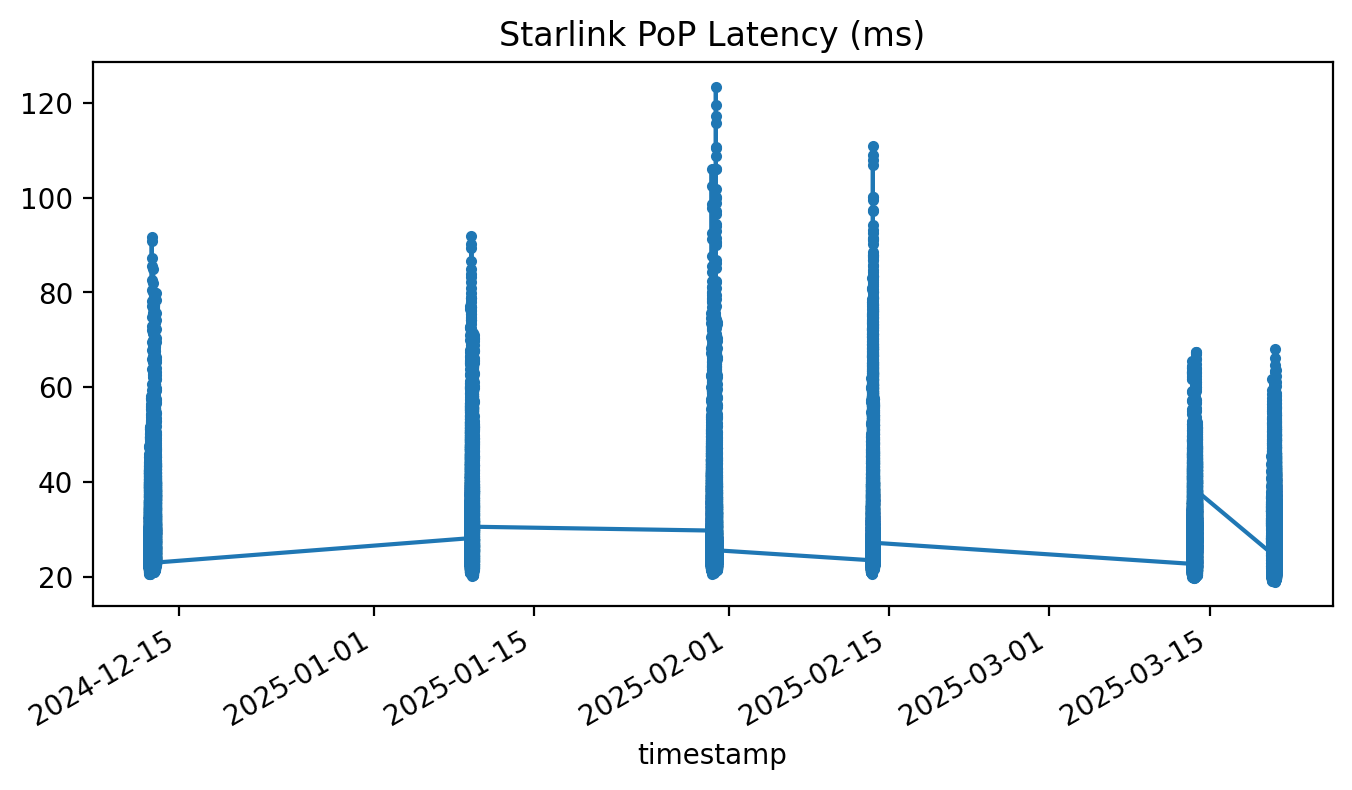

In [8]:
df['dish_status.pop_ping_latency_ms'].plot(figsize=fig_size, style='.-', title='Starlink PoP Latency (ms)')

<Axes: title={'center': 'Starlink PoP Latency'}, ylabel='Frequency'>

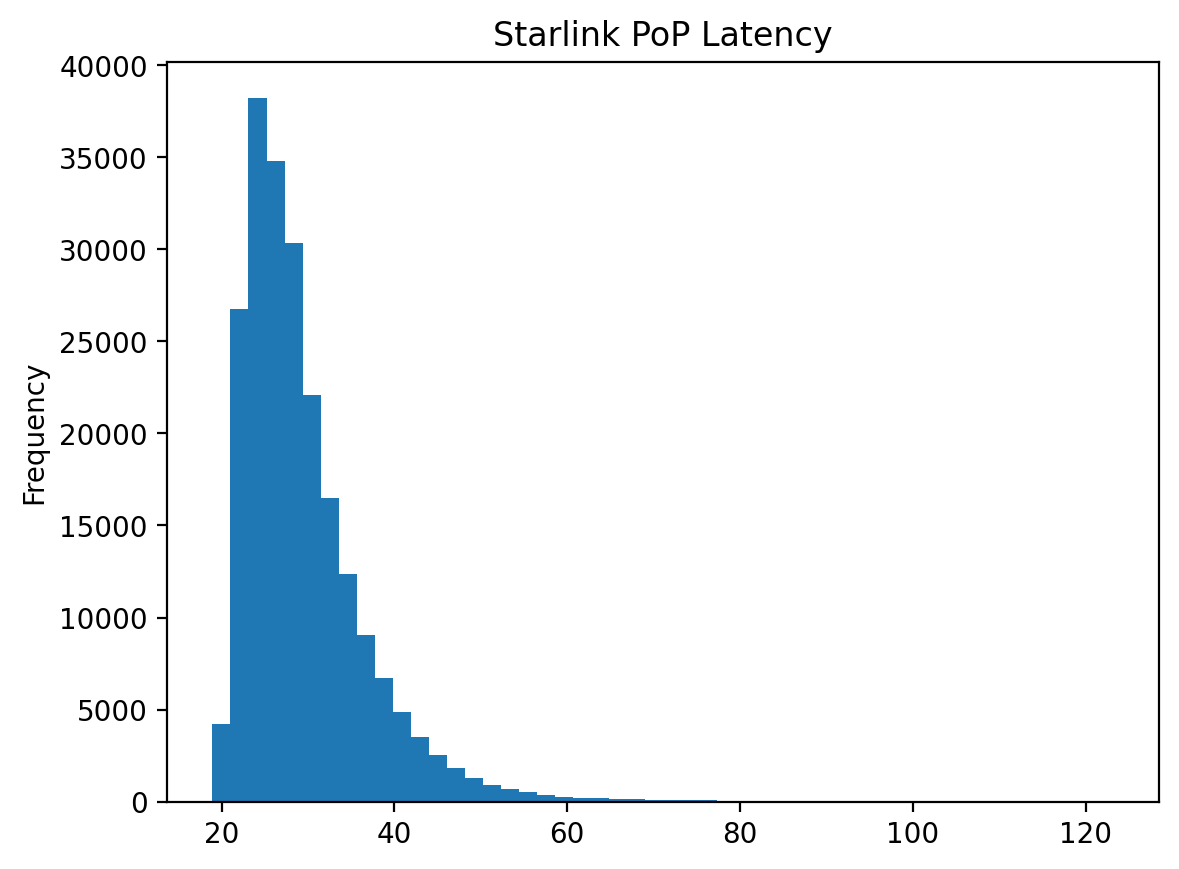

In [9]:
df['dish_status.pop_ping_latency_ms'].plot(kind='hist', title="Starlink PoP Latency", bins=50)

In [10]:
def get_map_CircleMarker(df, name, metric, map_name):
    # Create a map centered on the average latitude and longitude
    m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=12)

    # Normalize latency to a color map
    min_latency, max_latency = df[metric].min(), df[metric].max()
    colormap = colors.LinearSegmentedColormap.from_list(metric, ['green', 'yellow', 'orange', 'red'])

    # Add points to the map
    for _, row in df.iterrows():
        # Normalize latency to a range of 0 to 1 for the color map
        color = colors.to_hex(colormap((row[metric] - min_latency) / (max_latency - min_latency)))
        folium.CircleMarker(
            location=(row['lat'], row['lon']),
            radius=1,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"Latency: {row[metric]} ms at {row['timestamp']}"
        ).add_to(m)

    name='starlink'
    # Save map to HTML file
    map_file_path = f'./HTML-Maps/{map_name}.html'
    m.save(map_file_path)
    print(f"Map saved to {map_file_path}")

    return m

In [11]:
# create a full map of all ping, produces a large HTML file
# html_map = get_map_CircleMarker(df, 'Starlink', 'dish_status.pop_ping_latency_ms', 'all_ping_pop')

In [12]:
time_ranges = {
    '2024-12-12': {
        'from': '9:00:00',
        'to': '13:30:00'
    },

    '2025-01-09': {
        'from': '9:30:00',
        'to': '16:30:00'
    },

    '2025-01-23': {
        'from': '9:45:00',
        'to': '15:30:00'
    },

    '2025-01-30': {
        'from': '15:30:00',
        'to': '19:45:00'
    },

    '2025-02-13': {
        'from': '10:00:00',
        'to': '15:30:00'
    },

    '2025-03-13': {
        'from': '10:30:00',
        'to': '16:45:00'
    },

    '2025-03-20': {
        'from': '10:00:00',
        'to': '16:45:00'
    }
}

def filter_df_by_days(*days):

    result_df = pd.DataFrame()

    for day in days:
        start_time = f'{day} {time_ranges.get(day, {}).get('from', "00:00:00")}'
        end_time = f'{day} {time_ranges.get(day, {}).get('to', "23:59:59")}'

        mask = (df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)
        df_filtered = df.loc[mask]

        result_df = pd.concat([result_df, df_filtered])

    return result_df

days = list(time_ranges.keys())
df_filtered = filter_df_by_days(*days)

In [13]:
df_filtered['dish_status.pop_ping_latency_ms'].describe()

count      120334.0
mean      28.155609
std        6.779415
min       19.154432
25%       23.589567
50%       26.403214
75%       30.506479
max      110.908707
Name: dish_status.pop_ping_latency_ms, dtype: Float64

In [14]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120334 entries, 2024-12-12 09:06:37.738616+01:00 to 2025-03-20 16:44:59.741177+01:00
Data columns (total 73 columns):
 #   Column                                            Non-Null Count   Dtype                    
---  ------                                            --------------   -----                    
 0   @timestamp                                        120334 non-null  string                   
 1   dish_status.hardware_version                      120334 non-null  string                   
 2   dish_status.software_version                      120334 non-null  string                   
 3   dish_status.state                                 120333 non-null  float64                  
 4   dish_status.uptime                                120334 non-null  Int64                    
 5   dish_status.snr                                   0 non-null       float64                  
 6   dish_status.seconds_to_first_nonempty_sl

In [15]:
df_filtered.head()

,@timestamp,dish_status.hardware_version,dish_status.software_version,dish_status.state,dish_status.uptime,dish_status.snr,dish_status.seconds_to_first_nonempty_slot,dish_status.pop_ping_drop_rate,dish_status.downlink_throughput_bps,dish_status.uplink_throughput_bps,dish_status.pop_ping_latency_ms,dish_status.alerts,dish_status.fraction_obstructed,dish_status.currently_obstructed,dish_status.seconds_obstructed,dish_status.obstruction_duration,dish_status.obstruction_interval,dish_status.direction_azimuth,dish_status.direction_elevation,dish_status.is_snr_above_noise_floor,dish_status.wedges_fraction_obstructed,dish_status.raw_wedges_fraction_obstructed,dish_status.valid_s,dish_status.alert_motors_stuck,dish_status.alert_thermal_throttle,dish_status.alert_thermal_shutdown,dish_status.alert_mast_not_near_vertical,dish_status.alert_unexpected_location,dish_status.alert_slow_ethernet_speeds,dish_status.alert_slow_ethernet_speeds_100,dish_status.alert_roaming,dish_status.alert_install_pending,dish_status.alert_is_heating,dish_status.alert_power_supply_thermal_throttle,dish_status.alert_is_power_save_idle,dish_status.alert_moving_while_not_mobile,dish_status.alert_moving_too_fast_for_policy,dish_status.alert_dbf_telem_stale,dish_status.alert_low_motor_current,dish_status.alert_lower_signal_than_predicted,dish_status.alert_obstruction_map_reset,lat,lon,dish_status.altitude,dish_ping_stats.samples,dish_ping_stats.end_counter,dish_ping_stats.total_ping_drop,dish_ping_stats.count_full_ping_drop,dish_ping_stats.count_obstructed,dish_ping_stats.total_obstructed_ping_drop,dish_ping_stats.count_full_obstructed_ping_drop,dish_ping_stats.count_unscheduled,dish_ping_stats.total_unscheduled_ping_drop,dish_ping_stats.count_full_unscheduled_ping_drop,dish_ping_stats.init_run_fragment,dish_ping_stats.final_run_fragment,dish_ping_stats.run_seconds,dish_ping_stats.run_minutes,dish_ping_stats.mean_all_ping_latency,dish_ping_stats.deciles_all_ping_latency,dish_ping_stats.mean_full_ping_latency,dish_ping_stats.deciles_full_ping_latency,dish_ping_stats.stdev_full_ping_latency,dish_ping_stats.load_bucket_samples,dish_ping_stats.load_bucket_min_latency,dish_ping_stats.load_bucket_median_latency,dish_ping_stats.load_bucket_max_latency,dish_usage.download_usage,dish_usage.upload_usage,timestamp,lon_bin,lat_bin,region
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-12-12 09:06:37.738616+01:00,2024-12-12T09:06:37.738616+01:00,hp1_proto1,2024.12.04.mr46620,3.0,105949,NaN,0,0.0,895458.75,16106.126953,26.132265,0,0.000889,0,NaN,<NA>,<NA>,59.9529,81.747498,1,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",105547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,54.323869,10.162027,42.8,1,105917,0.0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",26.132265,"[26.132265090942383, 26.132265090942383, 26.13...",26.132265,"[26.132265090942383, 26.132265090942383, 26.13...",0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[26.132265090942383, nan, nan, nan, nan, nan, ...","[26.132265090942383, nan, nan, nan, nan, nan, ...","[26.132265090942383, nan, nan, nan, nan, nan, ...",111932,2013,2024-12-12 09:06:37.738616+01:00,"(10.162, 10.1628)","(54.3237, 54.3241)","(10.162, 10.1628); (54.3237, 54.3241)"
2024-12-12 09:06:38.740911+01:00,2024-12-12T09:06:38.740911+01:00,hp1_proto1,2024.12.04.mr46620,3.0,105950,NaN,0,0.0,827896.875,19293.798828,26.397758,0,0.000889,0,NaN,<NA>,<NA>,59.493244,81.760651,1,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",105548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,54.323869,10.162026,42.8,1,105918,0.0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
# create a filtered map of all ping, produces a large HTML file
# html_map = get_map_CircleMarker(df_filtered, 'Starlink', 'dish_status.pop_ping_latency_ms', 'filtered_ping_pop')